In [1]:
import seaborn as sns
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.dates as dates
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
import xgboost as xgb
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.style as style
from xgboost import plot_importance

In [2]:
data=pd.read_csv('train1.csv')
data.head()

,BJFS,BJYQ,BJSH,BJGB,TJBD,TJBH,TJWQ,HEYY,HELQ,HELY,HECC,HEZJ,HECD,HECX,HETS,SXLQ
0,0.01502,-0.01460,-0.01518,-0.02107,-0.01494,-0.05670,-0.09392,-0.02463,-0.02155,-0.03086,-0.01620,-0.00602,-0.01941,-0.07829,-0.01301,-0.02615
1,0.00656,-0.01830,-0.01504,-0.02191,-0.02039,-0.06065,-0.09613,-0.03097,-0.02718,-0.03442,-0.02593,-0.01652,-0.02710,-0.08521,-0.01721,-0.02980
2,0.01247,-0.01197,-0.01129,-0.01348,-0.01345,-0.05397,-0.09328,-0.02190,-0.01968,-0.02785,-0.01644,-0.00888,-0.02035,-0.07737,-0.00989,-0.02188
3,0.01429,-0.00682,-0.01008,-0.01132,-0.01077,-0.05162,-0.09118,-0.02017,-0.01842,-0.02431,-0.01313,-0.00642,-0.01778,-0.07448,-0.00830,-0.01914
4,0.01597,-0.00698,-0.00759,-0.00943,-0.00980,-0.05181,-0.08622,-0.01949,-0.01651,-0.02336,-0.01223,-0.00565,-0.01818,-0.07407,-0.00585,-0.01741


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BJFS    730 non-null    float64
 1   BJYQ    730 non-null    float64
 2   BJSH    730 non-null    float64
 3   BJGB    730 non-null    float64
 4   TJBD    730 non-null    float64
 5   TJBH    730 non-null    float64
 6   TJWQ    730 non-null    float64
 7   HEYY    730 non-null    float64
 8   HELQ    730 non-null    float64
 9   HELY    730 non-null    float64
 10  HECC    730 non-null    float64
 11  HEZJ    730 non-null    float64
 12  HECD    730 non-null    float64
 13  HECX    730 non-null    float64
 14  HETS    730 non-null    float64
 15  SXLQ    730 non-null    float64
dtypes: float64(16)
memory usage: 91.4 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BJFS,730.0,0.014650,0.006895,-0.00401,0.009840,0.015120,0.018857,0.03715
BJYQ,730.0,-0.007020,0.006965,-0.03382,-0.011840,-0.006845,-0.002472,0.02522
BJSH,730.0,-0.008013,0.007238,-0.02724,-0.012950,-0.008270,-0.003618,0.02906
BJGB,730.0,-0.010777,0.006634,-0.03305,-0.015138,-0.010745,-0.006200,0.00833
TJBD,730.0,-0.012132,0.006565,-0.02959,-0.016580,-0.011625,-0.007812,0.01637
TJBH,730.0,-0.073437,0.012582,-0.10862,-0.083095,-0.074790,-0.063350,-0.04650
TJWQ,730.0,-0.139170,0.027748,-0.19528,-0.161560,-0.144780,-0.113000,-0.05366
HEYY,730.0,-0.021289,0.006237,-0.04130,-0.025460,-0.020995,-0.017435,0.00056
HELQ,730.0,-0.017308,0.007122,-0.04127,-0.022370,-0.017740,-0.012378,0.00461
HELY,730.0,-0.025495,0.006592,-0.04900,-0.029992,-0.025380,-0.021415,0.00021


In [3]:
train_x=data.drop(['HEZJ'],axis=1)
target=data['HEZJ']
target

0     -0.00602
1     -0.01652
2     -0.00888
3     -0.00642
4     -0.00565
        ...   
725   -0.00373
726   -0.00245
727   -0.00017
728    0.00489
729    0.00155
Name: HEZJ, Length: 730, dtype: float64

In [4]:
model=xgb.XGBRegressor(max_depth=6
                      ,learning_rate=0.3
                      ,n_estimators=100,
                          subsample=0.8)
oof1 = np.zeros(len(train_x))
answers = []
score = 0
n_fold = 5
num_epochs = 100
folds = KFold(n_splits=n_fold, shuffle=True,random_state=2000) #2020 #1000
for fold_n, (train_index, valid_index) in enumerate(folds.split(train_x)):
    X_train, X_valid = train_x.iloc[train_index], train_x.iloc[valid_index]
    y_train, y_valid = target[train_index], target[valid_index]
    model.fit(X_train,y_train,eval_set=[(X_valid, y_valid)],verbose=100,early_stopping_rounds=200)
    y_pre = model.predict(X_valid)
    oof1[valid_index]=y_pre.reshape(y_pre.shape[0])
print('RMSE-----------',
      np.sqrt(mean_squared_error(data['HEZJ'], oof1)))



[0]	validation_0-rmse:0.35203
[99]	validation_0-rmse:0.00354
[0]	validation_0-rmse:0.35296
[99]	validation_0-rmse:0.00361
[0]	validation_0-rmse:0.35404
[99]	validation_0-rmse:0.00368
[0]	validation_0-rmse:0.35147
[99]	validation_0-rmse:0.00325
[0]	validation_0-rmse:0.35418
[99]	validation_0-rmse:0.00332
RMSE----------- 0.003438933007863904


<ipython-input-5-c856c225d8c2>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(range(len(target)), target, label='true', lineWidth=5)
<ipython-input-5-c856c225d8c2>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(range(len(oof1)), oof1, label='fit', lineWidth=5)


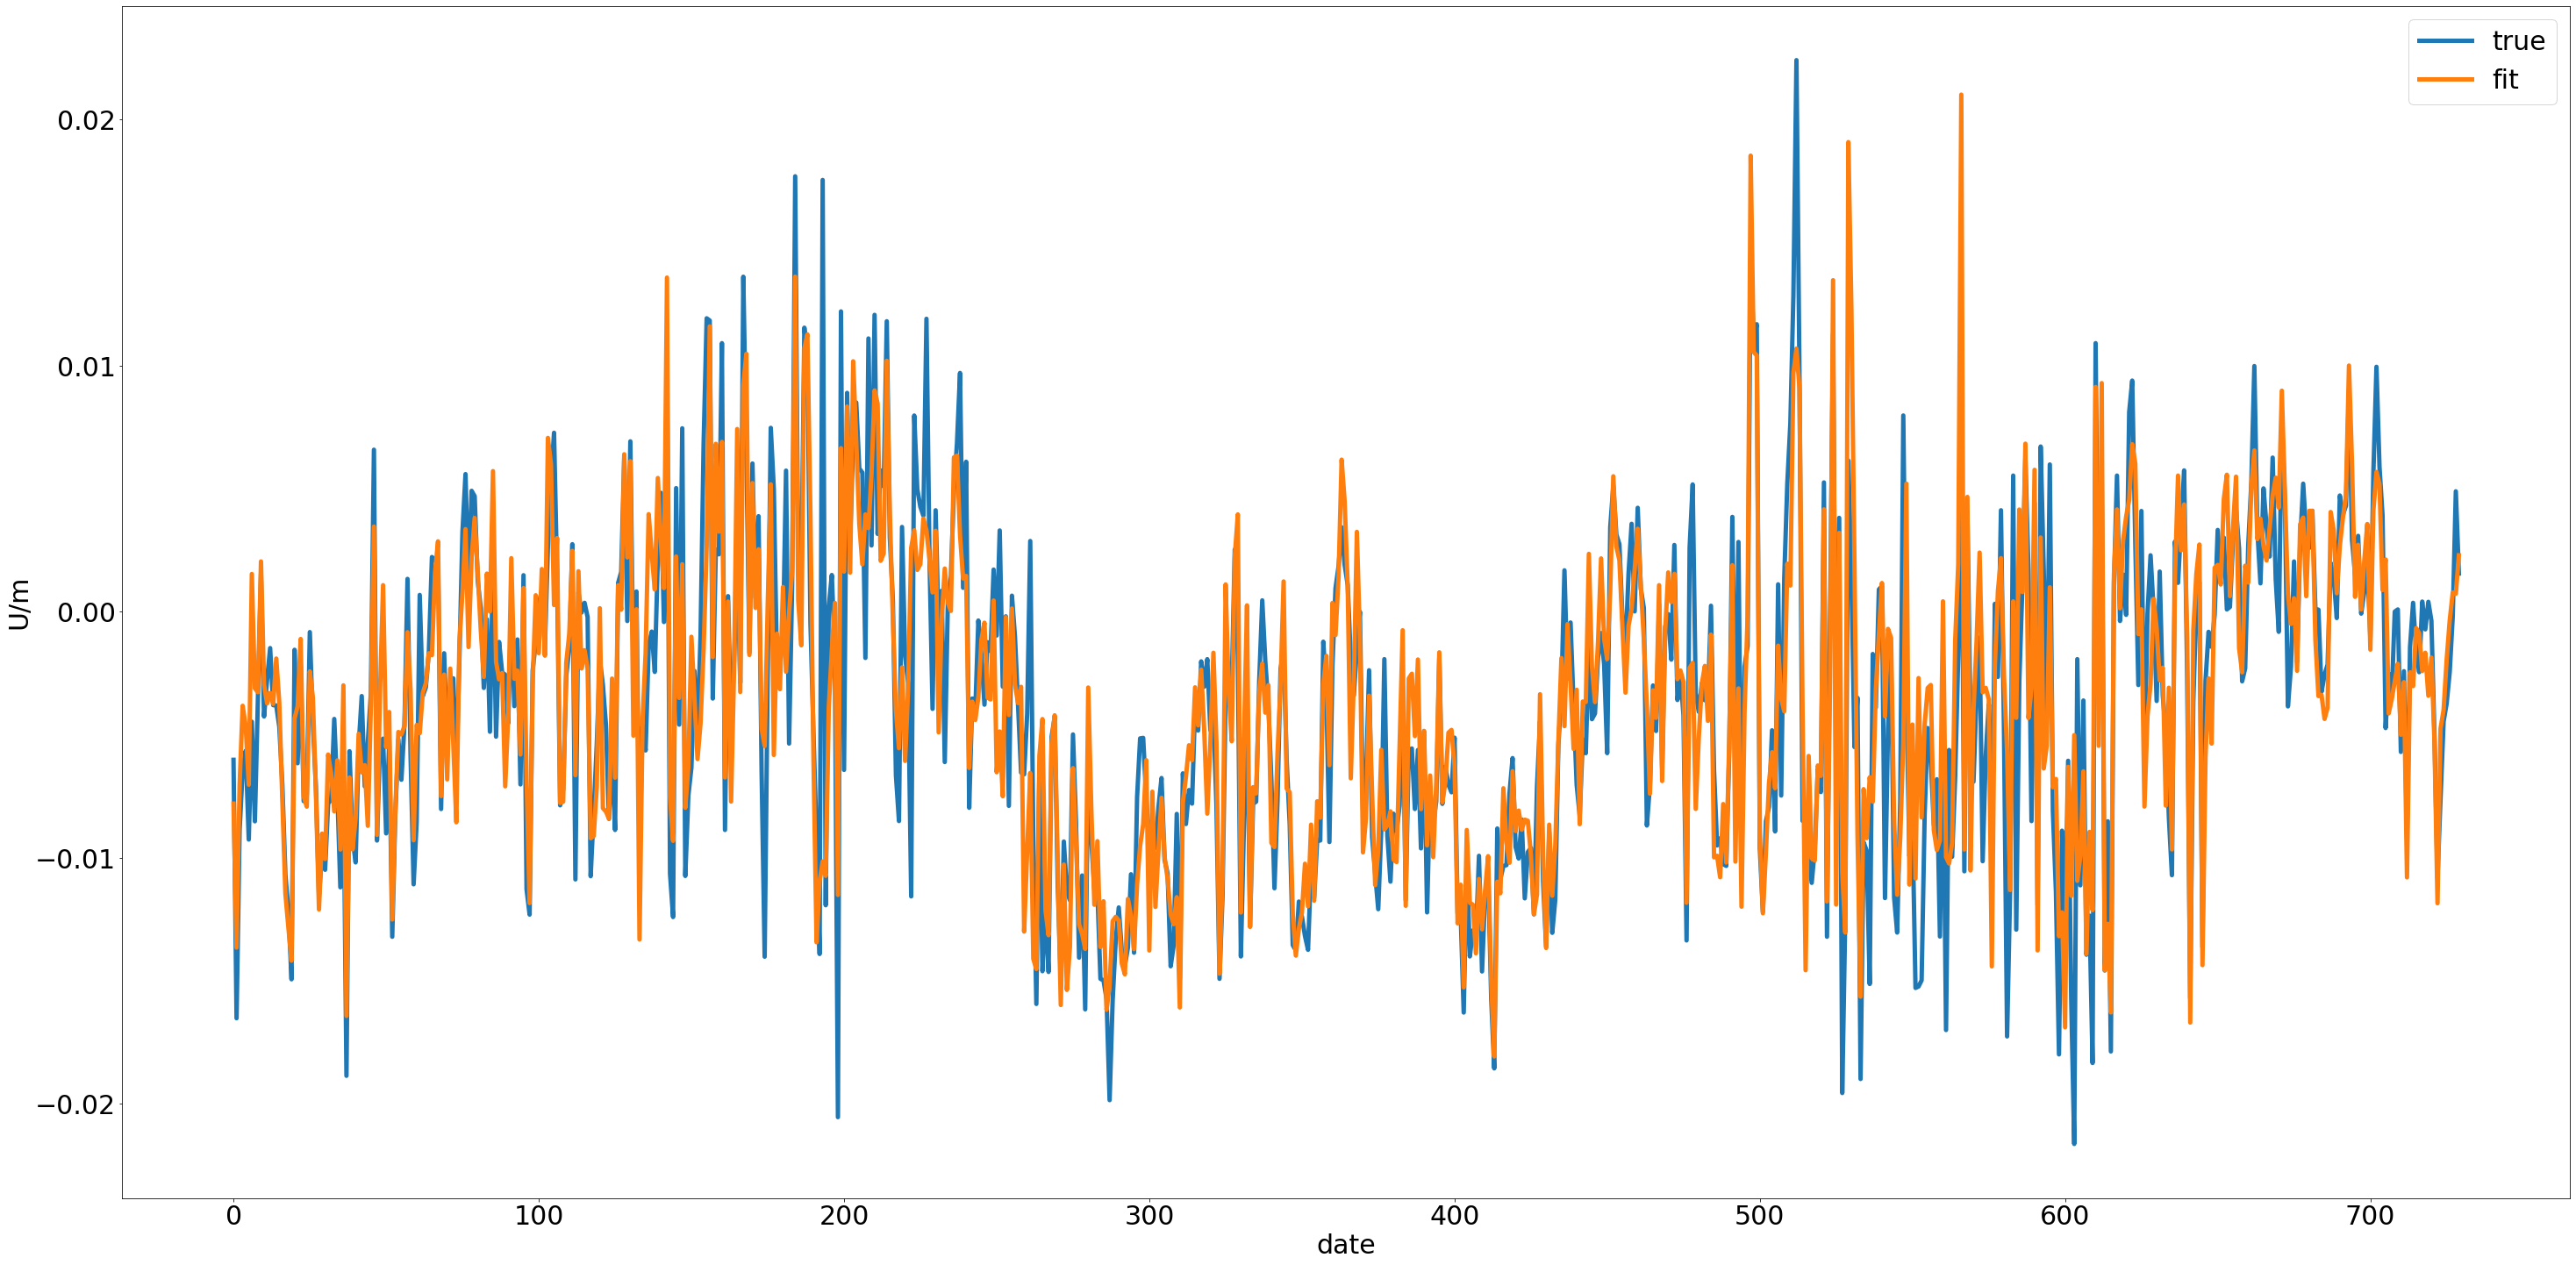

In [5]:
plt.figure(figsize=(50, 25))
plt.rcParams.update({'font.size': 30})
plt.plot(range(len(target)), target, label='true', lineWidth=5)
plt.plot(range(len(oof1)), oof1, label='fit', lineWidth=5)

plt.ylabel('U/m')
plt.xlabel('date')
plt.legend()

plt.show()

In [6]:
import pandas as pd
df = pd.DataFrame(oof1)
df.to_csv('output.csv')

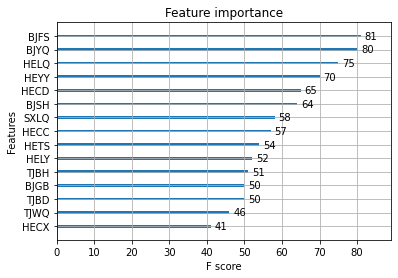

In [8]:
plot_importance(model)
plt.rcParams.update({'font.size': 10})
plt.show()

In [14]:
y_pre = model.predict(X_valid)
y_pre

array([-0.00760675, -0.01086222, -0.00071044, -0.01190811, -0.01087432,
       -0.0132446 , -0.00922804, -0.01417311, -0.0114718 , -0.01985674,
       -0.01536673, -0.01185203, -0.01104274, -0.02138919, -0.01139081,
       -0.01341145, -0.01063313, -0.00311615, -0.00863414, -0.0071293 ,
       -0.00817756, -0.00447439, -0.0106565 , -0.00275907, -0.00879898,
       -0.01554617, -0.01128947, -0.01136176, -0.0110283 , -0.00870903,
       -0.00644889, -0.00391297, -0.00990416, -0.00263029, -0.006873  ,
       -0.01225272, -0.00722402, -0.000798  , -0.00613048, -0.02000447,
       -0.00304482,  0.00154595, -0.00297167, -0.00350384, -0.00057316,
       -0.00821352, -0.00936326, -0.01277164, -0.00820299, -0.01380115,
       -0.01922941, -0.02027414, -0.02244236, -0.02206138, -0.01437545,
       -0.02293249, -0.02407274, -0.02146819, -0.02477856, -0.01356731,
       -0.01341909, -0.01465107, -0.00648486, -0.01341909, -0.01083906,
       -0.0170569 , -0.01649889, -0.01340936, -0.00804079, -0.01

In [16]:
y_valid

6     -0.00626
7     -0.00888
9     -0.00390
14    -0.01023
15    -0.01239
        ...   
718   -0.00895
719   -0.00718
720   -0.00623
725   -0.01018
728   -0.00804
Name: BJGB, Length: 146, dtype: float64

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_valid, y_pre)
rmse = mean_squared_error(y_valid, y_pre)**0.5
rmse

0.003241400021716759

In [41]:
valid_index

array([  6,   7,   9,  14,  15,  16,  21,  24,  26,  28,  40,  41,  48,
        52,  54,  60,  69,  78,  82,  83,  86,  91,  92, 103, 116, 117,
       124, 126, 134, 135, 141, 158, 164, 170, 172, 174, 183, 184, 186,
       192, 202, 203, 206, 207, 208, 232, 243, 248, 255, 268, 276, 277,
       279, 284, 285, 287, 290, 291, 292, 299, 304, 314, 325, 335, 339,
       349, 352, 356, 357, 358, 360, 361, 363, 368, 373, 376, 379, 386,
       388, 391, 396, 398, 399, 407, 410, 412, 415, 416, 417, 420, 430,
       432, 433, 451, 456, 459, 472, 473, 480, 484, 488, 502, 509, 513,
       516, 522, 527, 533, 534, 554, 555, 556, 564, 566, 567, 572, 574,
       575, 583, 591, 597, 603, 605, 609, 614, 621, 624, 635, 647, 658,
       660, 675, 679, 680, 688, 690, 693, 699, 706, 715, 717, 718, 719,
       720, 725, 728])

In [45]:
oof1

array([-1.47291496e-02, -1.99588332e-02, -1.25400973e-02, -1.08980248e-02,
       -8.38630646e-03, -1.28636388e-02, -7.60675222e-03, -1.08622164e-02,
       -6.75164908e-03, -7.10435561e-04, -7.35229533e-03, -6.89353514e-03,
       -5.82235912e-03, -7.50324503e-03, -1.19081102e-02, -1.08743170e-02,
       -1.32446010e-02, -1.65001806e-02, -2.19856799e-02, -1.96789838e-02,
       -9.40815639e-03, -9.22803860e-03, -1.00419028e-02, -1.42306602e-02,
       -1.41731137e-02, -7.42444769e-03, -1.14718005e-02, -1.09269517e-02,
       -1.98567398e-02, -1.65026858e-02, -1.96999107e-02, -1.06551256e-02,
       -1.43016474e-02, -1.61000956e-02, -1.42191667e-02, -1.64948832e-02,
       -1.21056261e-02, -2.26270817e-02, -1.26556987e-02, -1.55654820e-02,
       -1.53667293e-02, -1.18520306e-02, -1.00804893e-02, -1.41154286e-02,
       -1.33878272e-02, -1.36833452e-02, -1.45323772e-03, -1.78328753e-02,
       -1.10427430e-02, -1.39467223e-02, -1.30217448e-02, -1.07353609e-02,
       -2.13891901e-02, -